In [1]:
from Neural_Nets.LaengeNetModified.Development.LaengeNetModified import LaengeNetModified, LaengeNetModifiedLossFunc
from Neural_Nets.ThermoDatasetModified.Development.ThermoDatasetModified import ThermoDatasetModified
from Utils.PlotHandler.Development.PlotHandler import PlotHandler 
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.optim import *
from Data_Handling.SGTEHandler.Development.SGTEHandler import SGTEHandler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def epoch(net: LaengeNetModified, dataloader, loss_func, optimizer):
    epoch_losses = np.zeros([len(dataloader), ])

    for i, (temp, target) in enumerate(dataloader):
        temp = temp.unsqueeze(-1)

        # Forward pass
        prediction = net(temp.float())
        
        # Get the loss
        loss = loss_func(prediction, target)
        
        # Backward pass
        net.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses[i] = loss

    mean_epoch_loss = epoch_losses.mean(axis=0)
    #print('Mean epoch loss: ', mean_epoch_loss)
    return mean_epoch_loss

In [7]:
def train(net, dataset):
    # Hyperparameters
    n_epochs = 100000
    lr = 0.001
    batch_size = 64

    # Data
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Optimizer
    #optimizer = RMSprop(net.parameters(), lr=lr)
    optimizer = RMSprop(net.parameters(), lr=lr)
    loss_func = LaengeNetModifiedLossFunc()

    losses = []
    
    best_loss = epoch(net, dataloader, loss_func, optimizer)
    best_net = net

    for i in range(n_epochs):
        #print('-----\nEpoch %i:\n' % i)
        loss = epoch(net, dataloader, loss_func, optimizer)
        losses.append(loss)
        
        if loss < best_loss:
            best_net = net
            
        if i % 10 == 0:
            print(loss)
        
    return losses, net

In [12]:
net = LaengeNetModified(hidden_dim=16) 

element = 'Fe'
phase = ['BCC_A2']
start_temp, end_temp = 200, 2000

dataset = ThermoDatasetModified(element, phase, step=2, start_temp=start_temp, end_temp=end_temp)

losses, best_net = train(net, dataset)

Fe successfully selected!

98.51246891702924
58.710336787360056
78.22901444775718
48.67440482548305
54.24045397554125
41.026281458990915
65.59326682771955
57.595576116016936
51.34725168773106
46.94623521396092
59.88813437734331
53.03514821188791
71.22547600950513
93.40911595310483
57.79927127701895
64.78044261251178
47.80333495140076
48.3898469550269
50.03840857744217
44.74991955501692
54.218356711523874
57.44243202890669
109.07533196040562
51.56188993794577
70.43484769548688
44.71999572004591
46.17537912300655
55.44117954799107
50.82971848760332
55.158537183489116
46.358745847429546
48.774026257651194
45.30915439128876
50.600153718675884
49.8420136315482
51.400425761938095
63.56659875597273
45.7686356816973
55.28831080027989
49.78828637940543
36.87745417867388
44.02918669155666
40.9651848929269
46.67382206235613
40.34129772867475
44.70149142401559
45.12718009097235
42.21939575459276
37.09221519742693
36.27282965609005
37.580752747399465
39.11525169440678
41.935101304735454
38.32423459

5.023761373013258
7.265948942729405
4.1519389024802615
3.992784855621202
8.58169127362115
5.0404663000788
4.764610478920596
2.669849212680544
4.105336260582719
4.41025533793228
4.581789770828826
3.6481850306902612
3.8184127786329816
3.038719722202846
3.3978634418121407
5.51115654196058
2.7652680575847626
2.276597504104887
3.030497189079012
3.9806058311036656
5.986408831817763
3.7369311388049806
3.408339224755764
2.4715811163187027
5.4297003618308475
3.8990973383188248
3.4516669788530896
3.2783088428633556
3.674737299127238
2.4492074911083495
3.1966952197253704
3.005288479583604
5.599317968956062
4.034314771848066
3.8127168800149644
3.355787016451359
5.088083938828537
3.847672352833407
8.41228812666876
3.6012194425399815
5.572810577494757
3.4758728223719766
5.064221407685961
2.2606365020786012
4.049579988632884
3.4066317017589296
3.3052247454013144
7.95638889500073
3.630497238465718
3.2924028635025024
2.8380275113242015
2.597854201282774
7.777245300156729
3.903818174132279
3.66302041469

1.3545853081824524
1.6034585189606463
1.089128578214773
1.321716889007283
1.2286724832707219
1.1104959776358945
1.278065183066896
1.3273624777793884
1.5270212033231343
1.9922300311071532
2.0256315331373895
6.688515792999949
2.0542355807764188
1.0186160681769252
1.1360914739114898
1.4304641441309027
1.8010006962077958
1.2879579865506716
1.7872122024585093
1.3222359756806068
1.6503481236951691
1.351164319286389
1.1563818199293954
1.5093190016091935
1.204361492900976
1.0848303586244583
1.090278358996979
1.002711986723755
0.9378504182345101
0.8953020036486643
1.0671102833002806
2.989048801894699
1.087817030559693
1.4759231135249138
0.9780469005927444
1.1311185003391333
0.9930246852870498
3.5539822621004924
0.9597994666546583
1.9364232463496072
0.9667818149817842
1.8251159175166063
1.033665067250175
1.2153133795197522
1.1496742977095502
2.7375868963343755
2.123303027025291
1.588987823575735
1.5551640186458826
1.682271262364728
2.211466232580798
2.1217176552329744
1.5222837589681149
1.470509

5.1268282894577295
1.017663110579763
1.5975381239716495
0.9638360674892154
1.429822366152491
1.7548142751412732
1.1761500867349761
0.9252536014786789
8.281258182866233
1.0384657042367118
1.175720148320709
1.0262983569077082
1.0362321228853293
1.077932974057538
1.0487111524811812
1.5426827482879162
1.4728650373539753
1.0507802553474903
1.2580133147005523
1.2068966289183922
0.7220336435628789
0.8276286904833147
1.356308980711869
10.390094600883979
1.063114961343152
1.1848928561168057
1.4833502311791693
0.9527558082980769
1.5233480762690306
0.9024665855935642
1.151790125561612
1.4963818852390562
1.0265521566782678
2.0244589341538295
1.1775310880371503
1.0901738458446093
1.7373033070138522
1.0639169104397297
1.5105155413704259
0.8722058694277491
0.9977346658706665
1.0482132502698474
3.876165252711092
1.0469141059688158
1.3606174827686377
7.829622632690838
6.1084899598998685
5.427269125889454
5.220030702118363
6.232295457805906
6.240383418542998
6.336063385009766
6.1087416644607275
6.064434

0.6186224810246911
0.8104087886001382
0.9493690302063312
1.2135237351592099
1.3976943929280554
1.3965386695095472
0.7469542391066041
0.7779201565842543
0.6947813779115677
1.102702759206295
2.312536386506898
1.3785338274070196
0.9792406407317945
0.6318825776023524
1.6966250496251243
2.113928068961416
1.1722820699214935
0.6299844120762178
0.7009136549064091
0.8029901124536991
0.6997236564223256
0.7215889754838177
9.796892104404312
6.1875730171533565
0.7122265190950462
0.8375998184617076
0.9888550410313266
12.430677933352333
0.7307222235415664
0.8360417016914913
0.6676584889314005
1.0451798517523068
0.9142237848469189
1.0894422145294291
1.2077127015218139
1.6265345875705992
0.9098720610407847
1.027153453124421
0.6193145142335977
1.533386408617454
1.0530238939183099
5.2094904487686495
0.9541065237884011
4.162311722125326
0.5749473181952324
1.1013215075113945
0.6681208344442504
1.8452444417136056
1.445494263299874
0.86019580611693
2.7758043152945384
0.7957310306706599
0.5440772835697446
3.8

0.559971374858703
1.078180123918823
0.7703460798199687
0.6117196051803019
0.6257326660145607
1.0635689552873373
0.8788382399028966
0.8157225171370166
0.5546064172605318
1.1565317128385817
0.5166649322158524
0.8368448766414076
1.0234940119885974
0.913500467049224
0.5666869782975742
0.6835787418697562
0.8500303289453898
0.9626110180148056
0.7312570227576154
0.7226037091043379
0.6447233209120375
1.168946111574769
0.7717632921079972
1.1336964265044247
1.2298470363020897
1.048390209408743
1.0421520434319973
0.3969623158752386
0.7886890210211277
0.6003728094510734
0.9591015945853931
0.5207190388547522
0.8753905269716468
0.5821659570293767
0.6244770096881049
0.5376017596572638
0.5340492968846645
0.9667472530688558
1.055382036204849
0.5211711681913584
0.500518053237881
1.058208559506706
0.8041749700371709
0.6799799243786505
0.5628169115765819
0.715030486096761
0.7194581513426134
0.7169599799173219
0.68718222768179
0.6489356911874243
0.5773301949458463
0.4616101920338614
1.095906504829015
0.741

0.8928201299692903
0.549374076670834
0.7591122559138707
0.8394331382587552
0.7910834843558925
0.5992190768676144
0.6069377773840513
0.4805561507652913
0.5642898807834301
0.87925826292485
0.8666754266513246
1.1326756637011255
0.668458979310734
0.9263941868474441
2.643388812563249
0.4800939176763807
0.603111761888223
3.710796605795622
0.7756674529186317
1.1012807150504418
0.5870013787810292
1.1451092484806265
1.2202944933835949
0.5017049154266715
0.7658727478369006
0.6879062184930912
1.2506455600793873
5.204141399290945
2.843552263719695
0.7163286908928838
0.3247446214248027
0.31123850321663277
0.46540334368390696
0.35589432061117676
1.4227787868252821
0.5834262522070536
0.9826543115611587
0.5148704400552171
0.6096887222624251
0.5629358116005149
0.42859235405921936
0.42305997479707
0.5438303929487509
0.6500621599012187
0.5929627066611179
0.4928014899820222
0.4831209617134716
0.6182690554165414
0.5805851282285792
0.5831754715181887
0.9645178318023682
0.8587775247038475
0.678974483561303
0

1.432688710944993
1.807312455826572
1.530634411743709
1.1280484348535538
1.2393962852656841
0.9695295127374786
6.7426094476665765
1.0841131769120693
1.9886572126831328
1.084684535328831
1.253728593566588
3.7832063755818774
1.0591546329004424
0.9256202807383878
1.0499081696782793
0.9250212109514645
1.1759548980210508
1.374520253656166
0.9150164087436029
0.9682792647342596
1.0560336562671833
1.1507978300963129
1.902375052017825
6.129382615110704
1.0104450109813894
0.9017608293465206
0.9314148426055908
0.9830419022057738
0.9534446142081704
1.3589286264032125
0.9396152887493372
1.0602826933775629
1.2683450787195139
1.3178961617606026
1.2427758643669742
2.71514280885458
0.9543115331658295
0.9185483711106437
1.1340604842241322
1.0108720109398877
1.4160942259643758
1.1099668336766106
1.6539288333484106
1.0610774872558457
1.404100808181933
0.8761372795062405
1.0371558384171553
1.0098630083458764
1.1963571182319097
0.9899710549839905
1.162530327481883
1.919569096927132
2.0435685999691486
2.4579

0.7755645059847406
1.1655930019915104
1.0297193077525921
1.3139584258730923
0.5732915912355695
0.8712109987224851
0.8766887664262738
1.0535962717341525
0.8266754122450948
0.9570348845528704
1.0326124347214187
0.7521802513594074
1.1186144261487894
0.907542712454285
1.825795795236315
1.4259815665760212
1.1756353506020136
0.945173763270889
0.6909077126931932
0.8510035154010568
0.5302349658949035
0.8337036639984164
1.8849227683884757
0.7234642566846949
0.8194241144561342
0.5743351892701217
0.7790021821856499
1.1774463136680424
1.4247353585170848
0.8972461973316967
1.1570639738014765
0.611009083422167
0.8335851394970503
0.7609916677964585
0.7419964506157807
0.805968069604465
0.6451997651851603
0.6837870561118636
1.1243605560490064
1.1053900737980646
1.029785428728376
1.2204510707940375
0.5605624915499773
0.6772339937410184
0.5884713927017791
0.8365577987528273
0.9292637487607343
2.152802476925509
2.4272510558366776
0.8944973392145974
2.6991472196366106
0.8663321937035237
1.2169168133820807


1.421411506831646
3.1210022888013293
0.7518239932999548
1.176456871841635
3.4969327119844302
3.476226292550564
0.37754532255764517
3.0259810739329884
0.37988168706319164
0.32265764461564167
0.7749068267377359
1.4901758490928583
1.2962340036673206
0.6883540116250515
1.1316954743316663
1.0348913190620286
0.6093277635851077
0.9249453117538776
1.5954701283148356
2.853592584308769
0.5470413020146745
2.3820361771753857
0.9240383646850076
0.5638700066400426
0.8128468628440585
0.9828990979918412
1.7990290543862753
1.276784681315933
1.1344573417944568
0.4534407425671816
0.6359576615172305
1.2537373048918588
0.4844708096768175
0.9152224065868982
0.3253598266414234
0.32066224382392
1.0323495593454157
1.9648846821593386
0.6192431558987924
1.2641455357495164
0.45049309517656055
0.5073184142155307
0.28111374218549046
0.34086304610329016
1.9975358958223037
0.8192688832724733
0.498539572847741
0.7844801209867001
2.9449237201895033
1.2370413903679167
0.49995453655719757
0.29452128701710273
1.5462352739

5.581478604248592
6.020621135830879
6.093652972153255
5.856292933225632
7.015598837818418
5.563370198011398
5.975656909602029
3.228437896285738
5.008767017828567
5.33539772965014
6.123374415827649
4.6626170719308515
5.053823945777757
2.1268758720585277
4.2932833433151245
2.634549226079668
4.362492238304445
5.944945586579187
5.600902112466948
6.330288690115724
4.817248829773495
4.803380656455245
5.058706832783563
5.986207144601004
5.1134099417499135
5.000794106296131
4.203768993062632
4.838513141231878
7.656822410012994
6.128493564469474
3.9638812180076326
4.734846680292061
4.6781750332031935
4.739670625754765
4.65476117921727
6.384737855621746
4.549558863043785
2.202971343483244
7.136757458959307
8.386635567460742
6.080789800201144
4.543207995593548
4.371198249714715
5.941204873578889
4.385227916496141
4.525626661522048
4.412868906344686
4.204454691282341
4.340191266366413
4.013143907700266
4.331196301749775
5.783816918730736
1.960238743041243
2.3340898071016585
5.108092058982168
4.010

1.4240414617317063
2.2430317210299626
1.5830855390855245
2.0584843499319896
2.0480138563684056
2.66462194280965
1.7187738604843616
1.410818257502147
1.4247194592441832
2.2229167563574657
1.931481299655778
2.173232872571264
1.689708371247564
2.0829444250890186
3.0154967733791898
1.9096923715301923
1.6473541685513087
1.8068853616714478
1.1970261601465089
2.260140972478049
1.7738427466579847
2.1955553931849345
2.1152542286685536
1.209602097847632
2.122495472431183
1.6675494781562261
3.3458031160490855
2.1264089063874314
2.019155263900757
2.186512973691736
1.609669612986701
1.571316045309816
1.5064184495380946
1.899330964045865
1.6973116280777114
3.6431574023195674
2.2259139184440886
1.7946940852063042
1.4830576064331191
3.784288444689342
1.2657082714140415
1.931852909071105
3.466074542275497
1.1943953431078367
2.9727189423782483
2.0385616570711136
2.855855005128043
1.3436057892228876
2.1862930208444595
1.340883378471647
1.838658674487046
1.6708347861255919
2.476566902228764
1.382625000817

1.951093831498708
3.0678093241793767
1.994416568428278
2.011369902374489
1.6575540389333452
1.903490670557533
1.7045203114726715
1.6464817561209202
1.6306234789746148
1.5990719768617834
1.5934968441724777
2.0411864907613824
2.1552698141230002
2.4392603571925844
2.037458727934531
8.537889861634799
1.3516937409128462
2.23812906231199
2.719383554799216
1.4257871104138238
2.058394227709089
2.104480765759945
2.032100442264761
2.113015148256506
2.018248832651547
1.9058864529111557
2.0304168723523617
1.9181092120707035
2.059217027255467
1.9580000420766217
1.9812701280627931
2.175027972353356
1.9690746015736036
2.009962643363646
2.046997099582638
1.943419855886272
2.052515453525952
1.9407833048275538
2.12276632551636
2.033638515110527
2.177073647933347
1.7726928533187933
1.9244625576372658
2.0796486527792046
1.925334771828992
1.9424299821257591
1.9749729633331299
1.7096012121598636
1.7663914438869273
1.9176161141533936
1.7117173432239465
1.8238610745008503
1.5962791214031833
1.908640716491001


0.952637507979359
7.388628159250532
0.8930227676672595
2.1157675944268703
3.6687901594809125
2.548904713243246
2.0744200500526597
14.572195300034114
2.750008645866598
5.454474627971649
5.374395753656115
1.1170418273125375
1.147502330530967
1.0610139183700085
1.587027121335268
0.8595415111631155
3.3401298267500743
2.1374490750687465
2.3278421280639514
2.233211354751672
5.290008730122021
5.7447004701410025
3.1933626404830386
3.5455560630985667
13.819734799010414
0.8977650771183627
2.424176741923605
2.9339029570775375
1.9996239127857345
3.1473062991031577
1.4837952407875232
3.325564043862479
1.0847532067980086
2.2138555124402046
2.033164802406515
1.3425894736179285
8.71586672110217
3.1544526384345124
3.4320609888860156
1.706151075128998
8.519439890448536
1.465865000550236
4.016088502747672
1.4642439114728145
1.1919472217559814
1.8464736150843757
1.4113062947456325
4.740434753043311
2.05844790914229
5.879322626761028
1.2617335516427244
16.16541303907122
0.9937088494854314
1.105578712586845

1.7750784009695053
1.7553527658539159
1.7214392620537962
1.6609721843685423
1.0167413564132792
1.1991160011717252
1.1797785240092449
0.8480783349701336
0.9850878619721958
0.859387280552515
0.8733714451747281
1.7598592138716154
0.8363124949059316
0.8724933790841273
0.9436855640794549
0.8439587242901325
10.789409713021346
2.6565143764019012
1.0270880040313517
0.9402585375521865
0.8285857367196253
0.896112144525562
0.8907936485484242
0.9531586818130953
1.345823694552694
2.0621822588145733
0.8656019999512604
0.8328292444348335
0.8892347099525588
0.9641516240579742
0.8613295112071293
0.8228162521762508
1.7475658942546164
1.1767817182200295
1.3948035900081908
1.705551684967109
2.1911297674689973
1.1779496281274728
0.9286254732204335
2.408104506986482
1.2797159967677934
1.4246876718742507
1.40782669665558
1.5786437136786324
1.3616110464291913
0.8619496678667409
1.143902369907924
18.10232456986393
0.843100950920156
1.2015590846006359
1.120302944311074
0.8724433774394649
0.8682837084467921
0.86

1.641546564442771
0.8829925555203643
1.2704615364117282
0.8162303487105029
0.6612442713230848
0.9620354047843388
0.7989623605140618
0.7530575155147484
2.9327024591288398
3.11312442698649
1.4148317745753698
0.8052961174398661
0.9425713840339865
9.41499842277595
0.6846171255622592
0.8469202880348478
1.7670248204043932
1.1573977092547076
0.959266960487834
1.6104125758366925
1.4727932938507624
0.8462724307818072
0.7156240801726069
0.6985975243151188
5.291307398251125
0.7442421370318958
0.6905615186052663
0.6497770122119358
0.8116845112027866
0.6918137078838689
1.510387668652194
0.8018328582069704
0.7040155921131372
5.737699506538255
0.6801706214568445
0.695102188337062
1.7725423537194729
1.7070476462000184
0.80986017201628
0.7448302414268255
0.8611224224524838
2.6413413179772243
0.710060673499746
0.8215589227953127
3.5410087779164314
0.6862012978110995
0.8735948106540101
1.1609474886208773
0.7359129360743931
1.3801213502883911
2.1678109552179063
0.8316407391269293
1.0851740512464727
0.8864

0.7730568354683263
0.6894276498683861
2.3405199253133366
2.075101461527603
0.8144201577774116
0.851901169068047
1.9551070172871863
0.7612071287419114
0.8688509166240692
0.7427840930010591
0.9717177679496152
0.7345730042351144
0.7662678649649024
0.7471246945538691
0.771761800029448
3.2681103978039965
2.4045543014737114
1.2101630100182124
0.8168900928327015
0.6778790854981968
0.6908577190978187
1.4485255889594555
0.7486475256404707
0.6955127316926207
6.207364413355078
0.7995269261300564
0.6910236214420625
0.8956745165799346
2.419842630624771
1.0468898958393507
1.0452602614781685
2.4189755597284863
2.371044288788523
0.787630609901888
0.9027733140225921
1.2690080553293228
1.1499320808798075
0.5878723713436297
0.6193995834993464
0.8596675869609628
0.8742583471217326
0.7440356819757393
0.8224679505718606
30.44352524621146
0.9159873223730496
1.4555912488805396
0.7184425784008843
0.8790602066687175
1.042386099163975
0.6771843965564456
0.8906046402241502
1.0584889368287154
1.0871246268174477
0.

1.70395880777921
2.9214367169354643
2.8320066588265553
2.0799123410667693
3.40275425357478
3.6055765758667673
2.020018250814506
5.006416516644614
1.8417889241661345
3.8032221272587776
1.893950576228755
2.583069604422365
4.426466863070216
2.3308654172079906
3.577623175723212
1.9079011481787478
2.343584021287305
1.9742071224110467
2.7421527302690913
4.32004677610738
4.5227218355451315
2.4961263047797337
2.220764692340578
2.8327163394008363
2.83067840550627
1.779444063880614
3.320953750184604
3.910444055284773
1.8351420600499426
1.8939426690340042
1.903895551604884
3.3588911784546718
1.9943283189620291
1.7677783827696527
1.6067323381347316
1.9142828189900942
2.671740112560136
4.385358762528215
2.0646168711994375
4.285916968115738
2.0676895401307513
3.612434024257319
4.479802321110453
4.216448847736631
2.169999621808529
2.1127544439264705
4.356940312044961
2.3834954840796336
3.6630381047725677
4.250134010400091
2.116160093673638
2.0778035734380995
3.8141638530152187
1.9318555146455765
1.81

1.2297041730156966
1.7726009003818035
1.846331192978791
1.5486680966402804
1.5159108503056424
1.3258918592972415
1.5082296111754008
1.4063917598021882
1.1224486229142971
1.1873727975679296
1.2865491903253965
3.6596989450710162
2.3447917976549695
5.435367897152901
2.2601522585111007
1.9081873063530241
1.1235763765871525
3.4890558230025426
1.2787637545594148
1.2109450514295272
1.3194652566952365
1.2317022447075163
3.0831602524433817
1.8276109487882681
1.3420484316136156
8.406112637104732
6.569911739655903
3.80182286085827
1.5647534791912352
2.3845568698431765
4.062373851026807
6.132846950420311
2.7729773904596056
4.8093226956469675
3.0271204007523402
1.915026989366327
1.6933313219674997
0.9773985799401999
2.2927370571664403
6.687107337372644
2.2776628376117776
5.2572493606380055
2.6810037483062064
1.0980185930218016
1.226102752611041
5.168090724519321
1.5441968834825925
1.158157276255744
2.7292767826999937
1.7215559067470687
1.5199550645692008
1.3536891782922404
5.862174165035997
1.40304

2.271501300590379
2.3372535689600875
2.244316357587065
2.3784084426505223
2.4335283088896955
2.919657969049045
2.319380500486919
2.3708638570138385
2.346733301079699
2.3513057455420494
2.291166833468846
2.2976306123392924
2.3524297268262933
2.659977595720972
2.277881664357015
2.1122862175107002
2.2505507144544805
2.272251225209662
2.320772279586111
2.1328196035964146
2.306290028350694
2.291881037609918
2.2344550298792973
2.586600418601717
2.8479437987719263
2.308952973889453
3.01729404181242
2.165004257644926
1.9362119736948185
2.229109782193388
2.4417534449270795
1.6862252604748522
2.3302061427384615
2.6027545098747527
2.3848688634378568
2.797837344663484
2.3027183977620944
2.2937416434288025
2.326040276459285
2.286052624428911
2.3256548793454255
2.1793283181531087
2.293650608908917
2.3650832963841304
2.0878863292081014
2.350963053426572
2.269794080938612
2.380759116794382
2.545866464397737
2.2684211464864865
2.7576603846890584
2.1856519574565545
2.3665235292698656
2.886212163737842
2

1.5096177881849664
1.7469500425670828
1.5954716628683465
1.553385404869914
1.9967045549835478
1.2336775905984854
1.3760013519121068
1.0140526205567377
1.318326573685876
1.6540975411023413
1.1758466946360255
1.7895578092762403
2.2045931949147155
1.2187310974778873
1.690661487568702
1.5885313218459487
2.40900886750647
1.463486269382494
2.46874207444489
1.089451614767313
2.0571269081639394
1.9663004986941814
2.511082786800606
1.8387591056525707
1.551944807704006
1.854994812714202
1.1099414208105631
1.5736704633704253
1.0922835543086487
1.2580286571756005
2.076863534482462
1.4274233568991934
1.7940652160240071
2.0873453369630233
1.4972286620842559
1.3513896957572018
1.8185380601457186
1.6291961028639759
1.611591160829578
2.8514414142285074
0.9624760943864074
2.710893007527505
3.1604002251156738
1.8586448940581508
1.0716799612024002
1.663185529410839
1.8170876460415977
1.255178406302418
3.5706141258456876
2.831316301865237
3.3105943309409276
2.130721210369042
1.0564884721700634
1.6717581997

1.097615659236908
1.5421485272901398
1.4946891425975732
1.3510055478130067
0.7477741443685123
2.1426809251840626
1.8430639768817596
8.084553337522916
1.8959925745480828
1.6875015869736671
1.7113921722131116
1.5678381410294346
0.5316089538059064
1.61519687676004
1.6587675396086914
2.082175526501877
1.7209215911903553
2.0411174402439167
2.1042649054101537
1.2787810183529342
1.2102446325921588
1.3427729117018836
1.7557816947145122
1.6595966637666737
1.6196961216628551
1.1965882714305605
1.1262953590069498
1.7377789740982865
1.9155366367527418
0.8053053106580462
1.3113957773894072
4.057912572153977
1.8635148081396307
1.3670317059648889
1.4720668531954288
1.3850580698677473
1.5951122005603142
1.3787545556468623
3.688961924718959
1.1062844008473414
1.5570916206176793
2.027794307896069
0.737854960241488
1.215907519949334
1.3992755987814494
1.4030526322977883
1.207573072186538
1.9066715228504367
1.7194246889225073
1.6792396140683974
1.4648322337972266
2.7081139045102254
1.6906506500339933
1.45

1.2726620337260621
1.290802642170872
1.2554560076179249
1.371045736329896
1.2188341433980636
1.1534437154020583
1.2242653061236655
1.1866672193365437
1.2358334272035532
1.1446954779593008
1.1099968861256326
1.1170766538541232
1.1906226766960961
0.9837480027760778
1.1897830697042602
1.0231545650666314
1.271306587250105
1.3132060622530324
1.0757945873109358
1.0023463969784123
0.8511439311717238
1.3714329060167074
1.2647732251456805
1.17235816576119
1.1080713288060255
1.2105311091457094
1.5015704397644316
1.1867490448057652
1.19757295612778
1.136906545875328
1.148995884694159
1.159967668088419
1.1312727451856648
1.2445980153445686
1.1345821480665887
1.0839791055768728
1.0953518016529935
1.0758479853559817
1.1452012679406576
1.3861754345042365
1.1172659442360913
1.0895094592124224
2.1699477455445697
0.8007990365315761
1.0288569054433279
1.1266877105725663
1.1284303377781595
1.0675555377134256
1.0811100639402866
1.1114210172423296
1.0908444511837192
1.0889978292398155
2.082459507243974
1.01

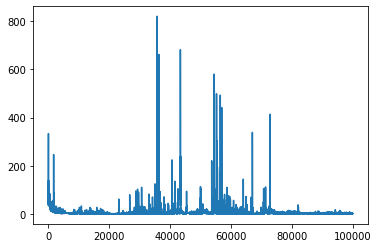

In [13]:
plt.plot(range(len(losses)), losses)

Fe successfully selected!



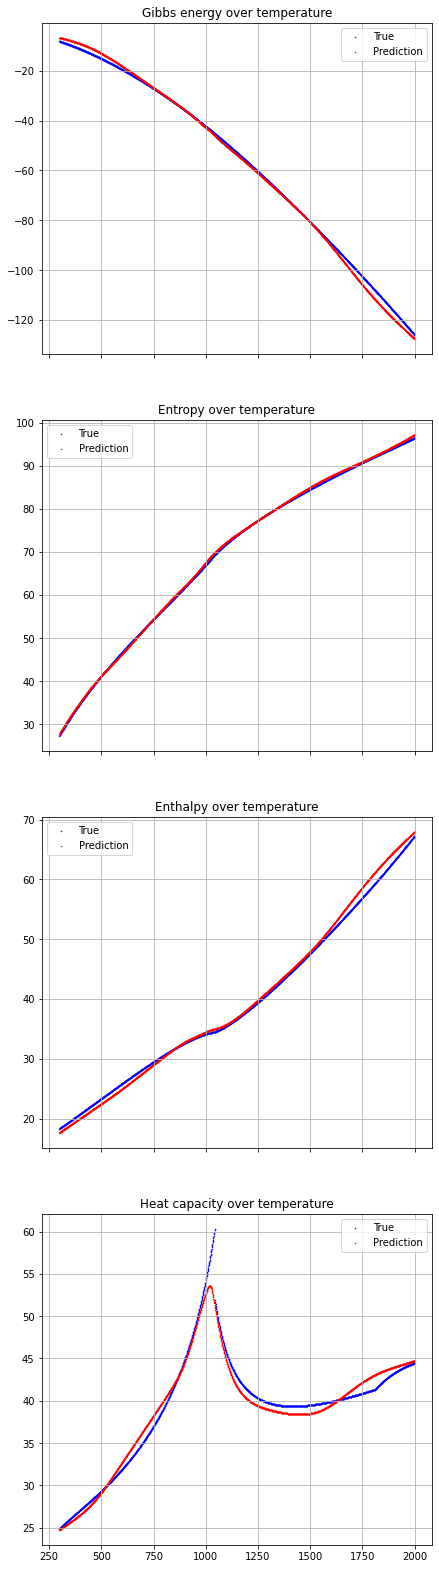

In [14]:
ph = PlotHandler('Laenge')

ph.properties_temp_modified(best_net, element, phase, start_temp=start_temp, end_temp=end_temp)

In [15]:
torch.save(net, 'Neural_Nets/LaengeNetModified/Models/model_08_02_22_1342')